## Exploratory Data Analysis of ShxtsNGigs Youtube Performance Data

### **Intro**
Embark on a journey of discovery through our Exploratory Data Analysis (EDA) for ShxtsNGigs YouTube performance. Uncover hidden insights as we delve into episode metrics, engagement trends, and audience interactions. From view counts to likes, comments, and beyond, join us in unraveling the data tapestry that shapes the success of ShxtsNGigs podcasts. Let the numbers tell the story of our YouTube journey, providing a unique perspective on what captivates our audience and fuels the excitement of our growing community.

1. What is the distribution of episode durations?
2. How are view counts distributed across different episodes?
3. Which episodes have the highest number of likes?
4. Are there any correlations between view counts, likes, and comments?
5. What is the distribution of comment counts across episodes?
6. Which guests have appeared most frequently?
7. How do episode durations vary based on the release day?
8. What are the most common words in the titles in the episodes?
9. Are there any trends or patterns in popularity over time?
10. Is there a relationship between episode duration and engagement metrics (views, likes, comments)?
11. What is the average duration of 10 episodes with the highest engagement (likes or views)?
12. Are there any outliers in the dataset, such as episodes with unusually high or low engagement(views)?
13. Is there any seasonality in release dates, view counts, or engagement metrics?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/shxtsngigs-podcast-youtube-performance/shxtsngigs_data.csv")
df.head()

,episode_number,episode_id,episode_title,guest,release_day,release_date,duration(seconds),view_count,likes_count,comment_count,topic_number,topics
0,1,k9QmUBSndUA,"Women Aren't In Danger, We Are",NaN,Monday,30/09/2019,2454,134251,5700,358,0,Null
1,2,lzuVVVP4ewY,"I Don't Condone Cheating, But…",NaN,Monday,07/10/2019,4998,130691,3900,226,2,"Top 5 insecurities every man must face, Monog..."
2,3,2vIiBLgUQrk,"Art & Design, We 're Tryna Marry The Two",John Atlas,Monday,14/10/2019,3856,28020,870,32,0,Null
3,4,amtQPR-RsKU,Mandem have Feeling Too,NaN,Tuesday,22/10/2019,4061,69186,2500,145,0,Null
4,5,5yVDFnVeV8I,"""Do The Right Thing And Get A SideMan""",NaN,Monday,28/10/2019,2494,38695,1800,79,0,Null


In [3]:
df.shape

(227, 12)

In [4]:
df.columns

Index(['episode_number', 'episode_id', 'episode_title', 'guest', 'release_day',
       'release_date', ' duration(seconds) ', ' view_count ', ' likes_count ',
       ' comment_count ', 'topic_number', 'topics'],
      dtype='object')

In [5]:
df.rename(columns={' duration(seconds) ': 'duration(seconds)', ' view_count ': 'view_count',' likes_count ':'likes_count',' comment_count ':'comment_count'}, inplace=True)
df.columns

Index(['episode_number', 'episode_id', 'episode_title', 'guest', 'release_day',
       'release_date', 'duration(seconds)', 'view_count', 'likes_count',
       'comment_count', 'topic_number', 'topics'],
      dtype='object')

### 1. What is the distribution of episode durations?

<Axes: >

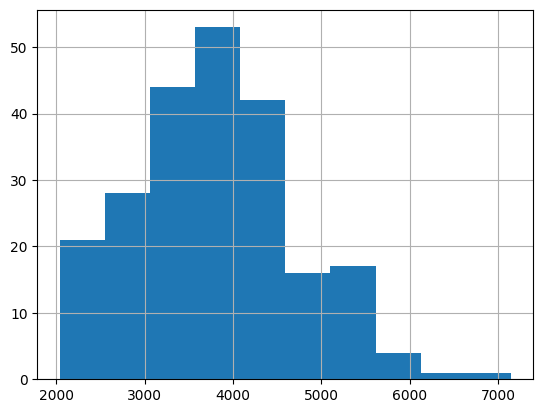

In [6]:
df['duration(seconds)'].hist()

### 2. How are view counts distributed across different episodes?

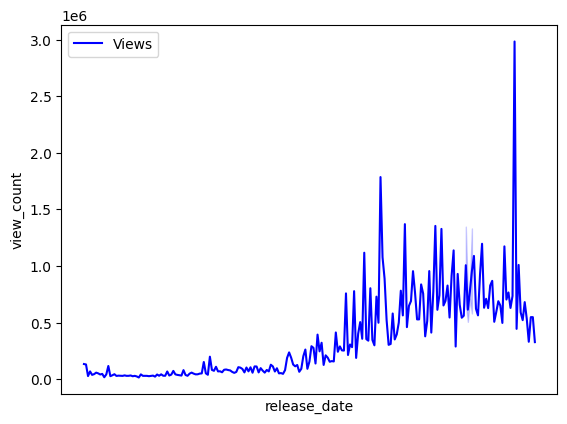

In [7]:
x = df['view_count']
y = df['release_date']
sns.lineplot(x=y, y=x, color='blue', label='Views')
plt.xticks([])
plt.show()

### 3. Which episodes have the highest number of likes?

In [8]:
df['view_count'] = pd.to_numeric(df['view_count'], errors='coerce')
top_3_episodes = df.nlargest(3, 'view_count')[['episode_title', 'view_count']]
top_3_episodes

,episode_title,view_count
216,CHUNKZ & FILLY,2983676
146,The Most Embarrasing Thing You'Ve Been Caught ...,1786094
158,I'M Cheating On You! - The Leader Of The Group!,1370128


### 4. Are there any correlations between view counts, likes, and comments?

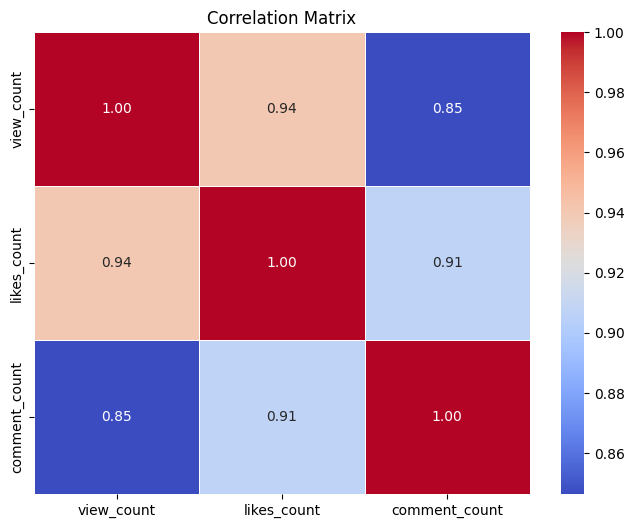

In [9]:
new_df = df[['view_count', 'likes_count', 'comment_count']]
correlation_matrix = new_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### 5. What is the distribution of comment counts across episodes?

<Axes: >

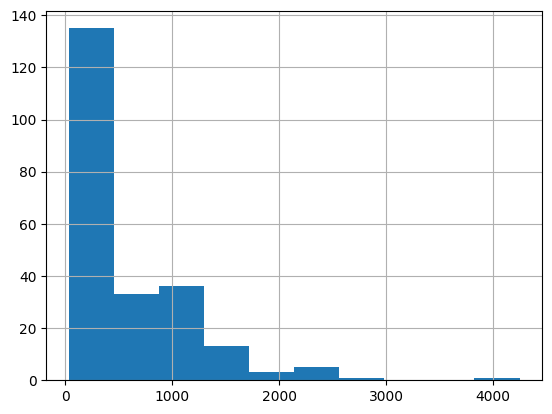

In [10]:
df['comment_count'].hist()

### 6. Which guests have appeared most frequently?

In [11]:
df['guest'].value_counts().idxmax()

'Jacob Banks'

### 7. How do episode durations vary based on the release day?

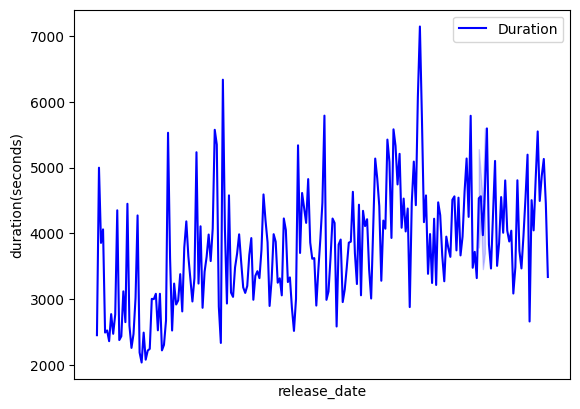

In [12]:
x = df['duration(seconds)']
y = df['release_date']
sns.lineplot(x=y, y=x, color='blue', label='Duration')
plt.xticks([])
plt.show()

### 8. What are the most common words in the titles in the episodes?

In [13]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

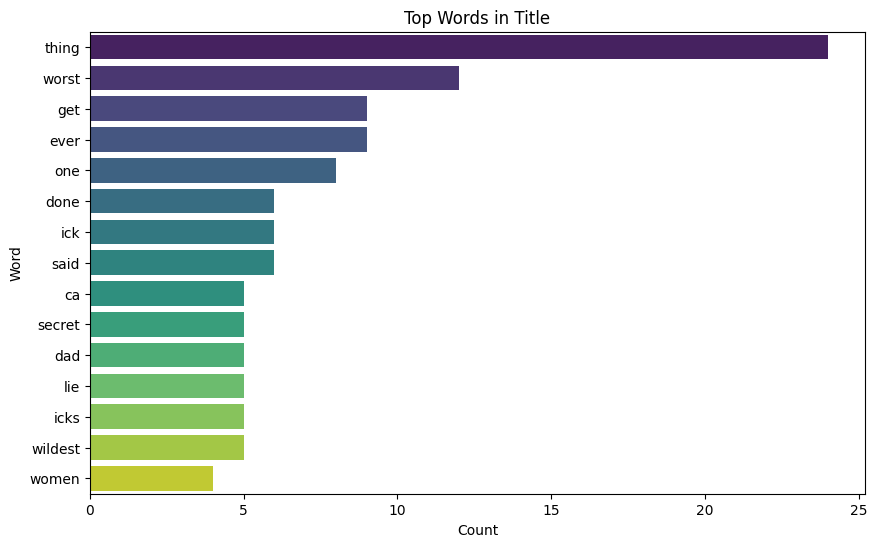

In [14]:
all_titles = ' '.join(df['episode_title'].str.lower())

tokens = word_tokenize(all_titles)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

word_count = Counter(filtered_tokens)

most_common_words = word_count.most_common(15)  

common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title('Top Words in Title')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

### 9. Are there any trends or patterns in popularity over time?

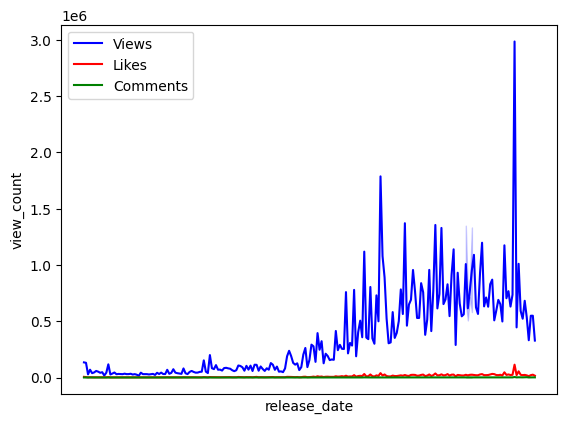

In [15]:
sns.lineplot(x=df['release_date'], y=df['view_count'], color='blue', label='Views')
sns.lineplot(x=df['release_date'], y=df['likes_count'], color='red', label='Likes')
sns.lineplot(x=df['release_date'], y=df['comment_count'], color='green', label='Comments')
plt.xticks([])
plt.show()

### 10. Is there a relationship between episode duration and engagement metrics (views, likes, comments)?

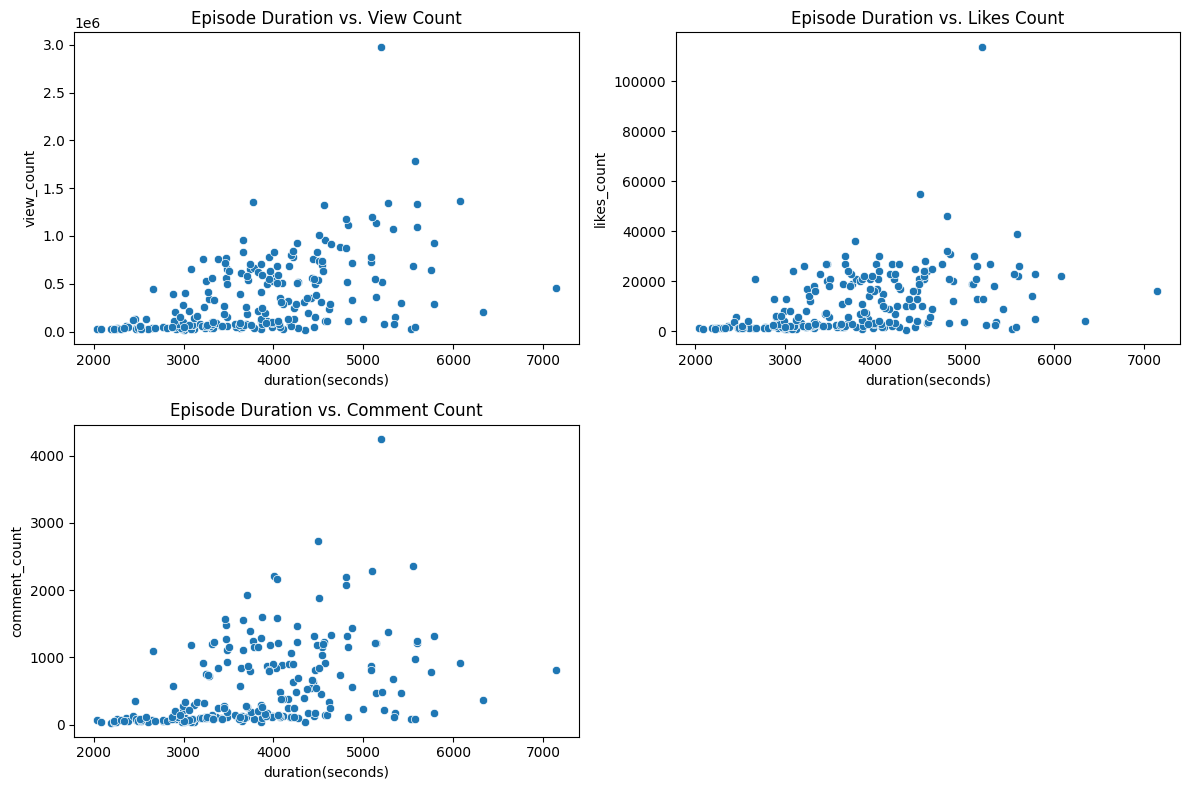

In [16]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='duration(seconds)', y='view_count', data=df)
plt.title('Episode Duration vs. View Count')

plt.subplot(2, 2, 2)
sns.scatterplot(x='duration(seconds)', y='likes_count', data=df)
plt.title('Episode Duration vs. Likes Count')

plt.subplot(2, 2, 3)
sns.scatterplot(x='duration(seconds)', y='comment_count', data=df)
plt.title('Episode Duration vs. Comment Count')

plt.tight_layout()
plt.show()

### 11. What is the average duration of 10 episodes with the highest engagement(views and likes)?

In [17]:
top_10_episodes = df.sort_values(by='view_count', ascending=False).head(10)
average_duration = top_10_episodes['duration(seconds)'].mean()
print(f'The average duration of the top 10 episodes with the highest engagement (views) is: {average_duration:.2f} seconds')

top_10_episodes = df.sort_values(by='likes_count', ascending=False).head(10)
average_duration = top_10_episodes['duration(seconds)'].mean()
print(f'The average duration of the top 10 episodes with the highest engagement (likes) is: {average_duration:.2f} seconds')

The average duration of the top 10 episodes with the highest engagement (views) is: 5111.90 seconds
The average duration of the top 10 episodes with the highest engagement (likes) is: 4631.50 seconds


### 12. Are there any outliers in the dataset, such as episodes with unusually high or low engagement(views and likes)?

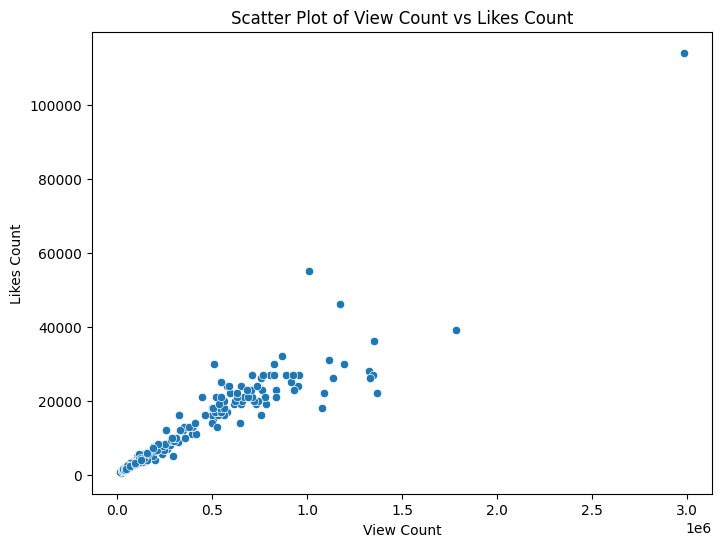

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='view_count', y='likes_count', data=df)
plt.title('Scatter Plot of View Count vs Likes Count')
plt.xlabel('View Count')
plt.ylabel('Likes Count')
plt.show()

### 13. Is there any seasonality in release dates, view counts, or engagement metrics?

/tmp/ipykernel_20/3092065433.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['release_date'] = pd.to_datetime(df['release_date'])


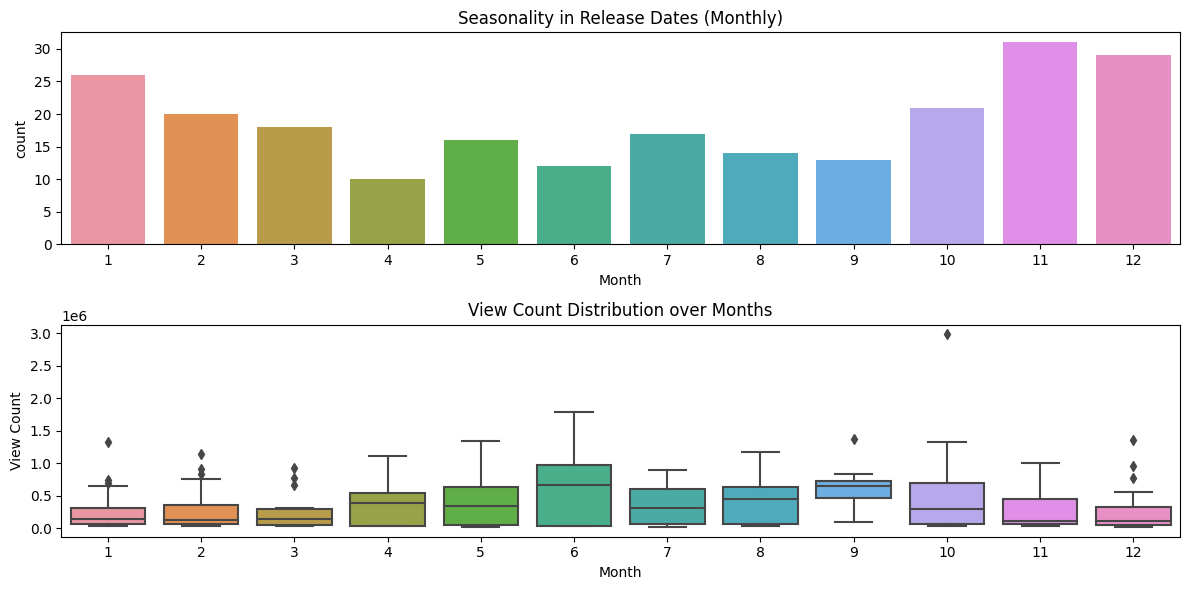

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])

df['month'] = df['release_date'].dt.month
df['year'] = df['release_date'].dt.year

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.countplot(x='month', data=df)
plt.title('Seasonality in Release Dates (Monthly)')
plt.xlabel('Month')

plt.subplot(2, 1, 2)
sns.boxplot(x='month', y='view_count', data=df)
plt.title('View Count Distribution over Months')
plt.xlabel('Month')
plt.ylabel('View Count')

plt.tight_layout()
plt.show()

### 